In [0]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


**DATA PART**

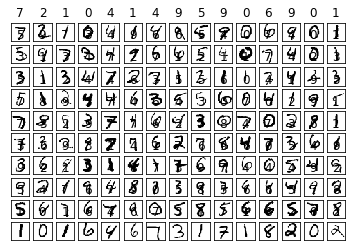

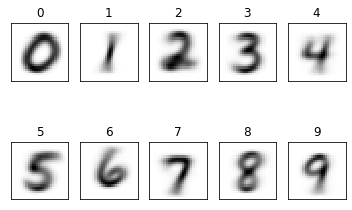

In [0]:
import matplotlib.pyplot as plt
import numpy as np

file_data   = "/content/drive/My Drive/mnist_test.csv"
handle_file = open(file_data, "r")
data        = handle_file.readlines()
handle_file.close()

size_row    = 28    # height of the image
size_col    = 28    # width of the image

num_image   = len(data)
count       = 0     # count for the number of images

#
# normalize the values of the input data to be [0, 1]
#
def normalize(data):

    data_normalized = (data - min(data)) / (max(data) - min(data))

    return(data_normalized)

#
# example of distance function between two vectors x and y
#
def distance(x, y):

    d = (x - y) ** 2
    s = np.sum(d)
    # r = np.sqrt(s)

    return(s)

#
# make a matrix each column of which represents an images in a vector form
#
list_image  = np.empty((size_row * size_col, num_image), dtype=float)
list_label  = np.empty(num_image, dtype=int)

for line in data:

    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])
    im_vector   = normalize(im_vector)

    list_label[count]       = label
    list_image[:, count]    = im_vector

    count += 1

#
# plot first 150 images out of 10,000 with their labels
#
f1 = plt.figure(1)

for i in range(150):

    label       = list_label[i]
    im_vector   = list_image[:, i]
    im_matrix   = im_vector.reshape((size_row, size_col))

    plt.subplot(10, 15, i+1)
    plt.title(label)
    plt.imshow(im_matrix, cmap='Greys', interpolation='None')

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

#-------------------------------------------------------------------------------

u = []

for i in range(784):
    u.append(0)

for i in range(784):
    if i % 2 == 0:
        u[i] = 1
    else :
        u[i] = -1

y = np.zeros((17 * 17, 6000), dtype=float)

for i in range(6000):

    pivot = 0
    label       = list_label[i]
    im_vector   = list_image[:, i]

    for j in range(289):
        y[j,i] = (u[pivot] * im_vector[pivot]) + (u[pivot + 1] * im_vector[pivot + 1]) + (u[pivot + 28] * im_vector[pivot + 28]) + (u[pivot + 29] * im_vector[pivot + 29])
        pivot = pivot + 2

for i in range(6000):
    for j in range(289):
        y[j,i] = 1 / (1 + np.exp(-1 * y[j,i]))


v = []

for i in range(289):
    v.append(0)

for i in range(289):
    if i % 2 == 0:
        u[i] = 1
    else :
        u[i] = -1

z = np.zeros((7 * 7, 6000), dtype=float)

for i in range(6000):

    pivot = 0
    label       = list_label[i]
    im_vector   = y[:, i]

    for j in range(49):
        z[j,i] = (v[pivot] * im_vector[pivot]) + (u[pivot + 1] * im_vector[pivot + 1]) + (u[pivot + 28] * im_vector[pivot + 28]) + (u[pivot + 29] * im_vector[pivot + 29])
        pivot = pivot + 2

for i in range(6000):
    for j in range(49):
        z[j,i] = 1 / (1 + np.exp(-1 * z[j,i]))


mid_term = []
for i in range(10):
    mid_term.append(0)

learning_rate = 0.1



lab = []
for i in range(10):
    lab.append(0)


w = np.ones((7 * 7, 10), dtype=float)

gradient_theta0 = []
gradient_theta1 = []
gradient_theta2 = []
gradient_theta3 = []
gradient_theta4 = []
gradient_theta5 = []
gradient_theta6 = []
gradient_theta7 = []
gradient_theta8 = []
gradient_theta9 = []

w0 = []
w1 = []
w2 = []
w3 = []
w4 = []
w5 = []
w6 = []
w7 = []
w8 = []
w9 = []

w0_space = []
w1_space = []
w2_space = []
w3_space = []
w4_space = []
w5_space = []
w6_space = []
w7_space = []
w8_space = []
w9_space = []

for i in range(49):
    gradient_theta0.append(0)
    gradient_theta1.append(0)
    gradient_theta2.append(0)
    gradient_theta3.append(0)
    gradient_theta4.append(0)
    gradient_theta5.append(0)
    gradient_theta6.append(0)
    gradient_theta7.append(0)
    gradient_theta8.append(0)
    gradient_theta9.append(0)
    w0.append(1)
    w1.append(1)
    w2.append(1)
    w3.append(1)
    w4.append(1)
    w5.append(1)
    w6.append(1)
    w7.append(1)
    w8.append(1)
    w9.append(1)


for i in range(100):
    for j in range(6000):

        label       = list_label[j]
        im_vector   = z[:, j]

        for k in range(len(w)):
            mid_term += w[k,0] * im_vector[k]

        mid_term = 1 / (1 + np.exp( -1 * mid_term ) )

        for k in range(10):
            lab[k] = 0

        for k in range(10):
            if k == label:
                lab[k] = 1
            else :
                lab[k] = 0

        for k in range(49):
            gradient_theta0[k] += ( (mid_term - lab[0]) * im_vector[k] ) / 6000
            gradient_theta1[k] += ( (mid_term - lab[1]) * im_vector[k] ) / 6000
            gradient_theta2[k] += ( (mid_term - lab[2]) * im_vector[k] ) / 6000
            gradient_theta3[k] += ( (mid_term - lab[3]) * im_vector[k] ) / 6000
            gradient_theta4[k] += ( (mid_term - lab[4]) * im_vector[k] ) / 6000
            gradient_theta5[k] += ( (mid_term - lab[5]) * im_vector[k] ) / 6000
            gradient_theta6[k] += ( (mid_term - lab[6]) * im_vector[k] ) / 6000
            gradient_theta7[k] += ( (mid_term - lab[7]) * im_vector[k] ) / 6000
            gradient_theta8[k] += ( (mid_term - lab[8]) * im_vector[k] ) / 6000
            gradient_theta9[k] += ( (mid_term - lab[9]) * im_vector[k] ) / 6000
         
    for j in range(len(w)):
        w0[j] = w0[j] - (learning_rate * gradient_theta0[j])
        w1[j] = w1[j] - (learning_rate * gradient_theta1[j])
        w2[j] = w2[j] - (learning_rate * gradient_theta2[j])
        w3[j] = w3[j] - (learning_rate * gradient_theta3[j])
        w4[j] = w4[j] - (learning_rate * gradient_theta4[j])
        w5[j] = w5[j] - (learning_rate * gradient_theta5[j])
        w6[j] = w6[j] - (learning_rate * gradient_theta6[j])
        w7[j] = w7[j] - (learning_rate * gradient_theta7[j])
        w8[j] = w8[j] - (learning_rate * gradient_theta8[j])
        w9[j] = w9[j] - (learning_rate * gradient_theta9[j])
        w0.append(w0[j])
        w1.append(w1[j])
        w2.append(w2[j])
        w3.append(w3[j])
        w4.append(w4[j])
        w5.append(w5[j])
        w6.append(w6[j])
        w7.append(w7[j])
        w8.append(w8[j])
        w9.append(w9[j])
        gradient_theta0[j] = float(0)
        gradient_theta1[j] = float(0)
        gradient_theta2[j] = float(0)
        gradient_theta3[j] = float(0)
        gradient_theta4[j] = float(0)
        gradient_theta5[j] = float(0)
        gradient_theta6[j] = float(0)
        gradient_theta7[j] = float(0)
        gradient_theta8[j] = float(0)
        gradient_theta9[j] = float(0)


training_loss = []

count = 0

mid = []

temp = []

#-------------------------------------------------------------------------------

for i in range(100):
    training_loss.append(0)

for i in range(10):
    mid.append(0)
    temp.append(0)


for count in range(100):
    for i in range(6000):
        label       = list_label[j]
        im_vector   = z[:, j]

        for j in range(10):
            mid[j] = 0

        for k in range(10):
            lab[k] = 0

        for k in range(10):
            if k == label:
                lab[k] = 1
            else :
                lab[k] = 0

        for j in range(49):
            mid[0] += w0[(49 * count) + j] * im_vector[j]
            mid[1] += w1[(49 * count) + j] * im_vector[j]
            mid[2] += w2[(49 * count) + j] * im_vector[j]
            mid[3] += w3[(49 * count) + j] * im_vector[j]
            mid[4] += w4[(49 * count) + j] * im_vector[j]
            mid[5] += w5[(49 * count) + j] * im_vector[j]
            mid[6] += w6[(49 * count) + j] * im_vector[j]
            mid[7] += w7[(49 * count) + j] * im_vector[j]
            mid[8] += w8[(49 * count) + j] * im_vector[j]
            mid[9] += w9[(49 * count) + j] * im_vector[j]
    
        for j in range(10):
            mid[j] = 1 / (1 + np.exp( -1 * ( mid[j] ) ))

        training_loss[count] += ( (-1 * lab[label] * np.log(mid[label])) - ( ( 1 - lab[label] ) * ( np.log( 1 - mid[label] ) ) ) ) / 6000


y1 = np.zeros((17 * 17, 4000), dtype=float)

for i in range(4000):

    pivot = 0
    label       = list_label[6000 + i]
    im_vector   = list_image[:, 6000 + i]

    for j in range(289):
        y1[j,i] = (u[pivot] * im_vector[pivot]) + (u[pivot + 1] * im_vector[pivot + 1]) + (u[pivot + 28] * im_vector[pivot + 28]) + (u[pivot + 29] * im_vector[pivot + 29])
        pivot = pivot + 2

for i in range(4000):
    for j in range(289):
        y1[j,i] = 1 / (1 + np.exp(-1 * y[j,i]))


z1 = np.zeros((7 * 7, 4000), dtype=float)

for i in range(4000):

    pivot = 0
    label       = list_label[6000 + i]
    im_vector   = y1[:, i]

    for j in range(49):
        z1[j,i] = (v[pivot] * im_vector[pivot]) + (u[pivot + 1] * im_vector[pivot + 1]) + (u[pivot + 28] * im_vector[pivot + 28]) + (u[pivot + 29] * im_vector[pivot + 29])
        pivot = pivot + 2

for i in range(4000):
    for j in range(49):
        z1[j,i] = 1 / (1 + np.exp(-1 * z[j,i]))


test_loss = []

count = 0
mid = []

temp = []

#-------------------------------------------------------------------------------

for i in range(100):
    test_loss.append(0)

for i in range(10):
    mid.append(0)
    temp.append(0)


for count in range(100):
    for i in range(6000):
        label       = list_label[j]
        im_vector   = z[:, j]

        for j in range(10):
            mid[j] = 0

        for k in range(10):
            lab[k] = 0

        for k in range(10):
            if k == label:
                lab[k] = 1
            else :
                lab[k] = 0

        for j in range(49):
            mid[0] += w0[(49 * count) + j] * im_vector[j]
            mid[1] += w1[(49 * count) + j] * im_vector[j]
            mid[2] += w2[(49 * count) + j] * im_vector[j]
            mid[3] += w3[(49 * count) + j] * im_vector[j]
            mid[4] += w4[(49 * count) + j] * im_vector[j]
            mid[5] += w5[(49 * count) + j] * im_vector[j]
            mid[6] += w6[(49 * count) + j] * im_vector[j]
            mid[7] += w7[(49 * count) + j] * im_vector[j]
            mid[8] += w8[(49 * count) + j] * im_vector[j]
            mid[9] += w9[(49 * count) + j] * im_vector[j]
    
        for j in range(10):
            mid[j] = 1 / (1 + np.exp( -1 * ( mid[j] ) ))

        test_loss[count] += ( (-1 * lab[label] * np.log(mid[label])) - ( ( 1 - lab[label] ) * ( np.log( 1 - mid[label] ) ) ) ) / 6000


training_loss_result = []
for i in range(100):
    training_loss_result.append(0)

for i in range(100):
    for j in range(10):
        training_loss_result[i] = training_loss[i][j]

test_loss_result = []
for i in range(100):
    test_loss_result.append(0)

for i in range(100):
    for j in range(10):
        test_loss_result[i] = test_loss[i][j]


**TASK 1**

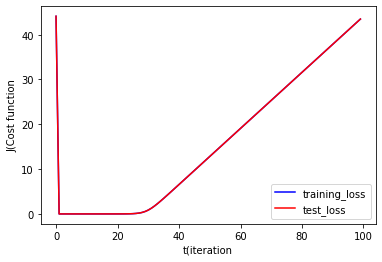

계산이 너무 오래걸려서... conversion을 못했습니다.
과제기간을 2주로 주셨으면.. 좋겠습니다...
이해하는 데 너무 오래걸렸는데.. 노력했습니다.


In [0]:
x = range(100)
plt.xlabel('t(iteration')
plt.ylabel('J(Cost function')
plt.plot(x, training_loss_result, 'blue', label='training_loss')
plt.plot(x, test_loss_result, 'red', label='test_loss')
plt.legend(loc = 0)
plt.show()
print("계산이 너무 오래걸려서... conversion을 못했습니다.")
print("과제기간을 2주로 주셨으면.. 좋겠습니다...")
print("이해하는 데 너무 오래걸렸는데.. 노력했습니다.")